# Machine learning avec les modules Python tensorflow2/keras 

# Contrôler l'*over-fit* d'entraînement par le *Early stopping* 


Ce notebook montre simplement comment mettre en oeuvre un `callback` tensorflow `Early Stopping` pour éviter le sur-entraînement d'un réseau.

Documentation à consulter : page [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping).

## Environnement Python de travail

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:normal"> 
L'état de l'art actuel des projets de machine learning sous Python préconise de travailler dans un <span style="font-weight:bold;">environnement virtuel Python3</span> qui permet de maîtriser les versions des modules Python "sensibles" (comme tensorflow par xemple) : dans le cas d'un démarrage de ton ordinateur avec une clef USB Ubuntu, on peut considérer que la clef fournit un environnement Python dédié (celui de la clef), à condition de ne pas faire de mises à jour des paquets Python.
    
Dans le cas contraire, le document <span style="font-style:italic">EnvironnementPython_tf2.pdf</span> explique comment créer un environnement Python dédié pour le travail avec le module tensorflow.
</span>
</div>

### Documentation tensorflow/keras

Le module **keras** qui permet une manipulation de haut niveau des objets **tensorflow** est intégré dans tensorflow2. La documentation du module **tf.keras** à consulter pour ce TP est ici : https://www.tensorflow.org/api_docs/python/tf/keras. 

Vérification des versions des modules Python validées pour ce TP sous Ubuntu 20 :
- Python 3.8.5
- tensorflow 2.4.0 incluant tensorflow.keras 2.4.0
- OpenCV 4.2.0

In [8]:
import tensorflow as tf
import tensorflow.keras as keras
import sys, cv2
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"OpenCV    : {cv2.__version__}")

Python    : 3.8.5
tensorflow: 2.4.0 incluant keras 2.4.0
OpenCV    : 4.2.0


Incrustation des tracés matplotlib dans le cahier IPython et import de modules utiles :

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# A/ Récupération et prétraitement des images MNIST

In [17]:
import numpy as np
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()

# 1/ Récupèrer le nombre d'images d'entrainement, de test et le nombre de pixels des images:
nb_im_train = im_train.shape[0]
nb_im_test  = im_test.shape[0]
nb_pixels   = im_train[0].size        # normalement : 28 x 28 = 784 pixels
print(f"{nb_im_train} images d'entraînement et {nb_im_test} images de test")
print(f"{nb_pixels} pixels dans chaque image")

# 2/ Mettre 'à plat' des matrices sous forme de vecteurs de floats normalisés dans [0., 1.]: 
x_train = im_train.reshape((nb_im_train, nb_pixels))/255.
x_test  = im_test.reshape((nb_im_test, nb_pixels))/255

from tensorflow.keras.utils import to_categorical
# 'hot encoding' des sorties :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

60000 images d'entraînement et 10000 images de test
784 pixels dans chaque image


# B/ Entraîner le réseau en arrêtant avant l'*over-fit*

On reprend la même construction du réseau que dans le TP1, mais on utilise keras pour arrêter automatiquement l'apprentissage en surveillant par exemple la croissance de la précision d'une `epoch` à l'autre. 

Le mécanisme consiste à définir des fonction *callback* qui sont utilisées par Keras lors de l'entraînnement grâce à l'agument nommé  `callback` :

Construction du réseau dense :

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

nb_classes = 10
np.random.seed(43)

# les 4 lignes pour construire le réseau de neurones:
model = Sequential()
model.add(Dense(nb_pixels, input_dim=nb_pixels, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Entraînement avec contrôle de l'over-fit :

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks_list = [
    EarlyStopping(monitor='val_accuracy',  # la grandeur à surveiller
                  patience=2,              # on accepte que 'val_accuracy' puisse diminuer 2 fois de suite
                  verbose=1)
]

# recharger les valeurs initiasles des poids du réseau:
model.load_weights("weights/initial")

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=15, 
                 batch_size=128, 
                 callbacks = callbacks_list,
                 verbose=1)

Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1963 - accuracy: 0.9408 - val_loss: 0.0935 - val_accuracy: 0.9707
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0744 - accuracy: 0.9777 - val_loss: 0.0721 - val_accuracy: 0.9769
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0453 - accuracy: 0.9866 - val_loss: 0.0632 - val_accuracy: 0.9807
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.0593 - val_accuracy: 0.9811
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0206 - accuracy: 0.9946 - val_loss: 0.0591 - val_accuracy: 0.9813
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0149 - accuracy: 0.9962 - val_loss: 0.0645 - val_accuracy: 0.9802
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0577 - val_accuracy: 0.9833
Epoch 

Noter l'arrêt avec le message **early stopping**...

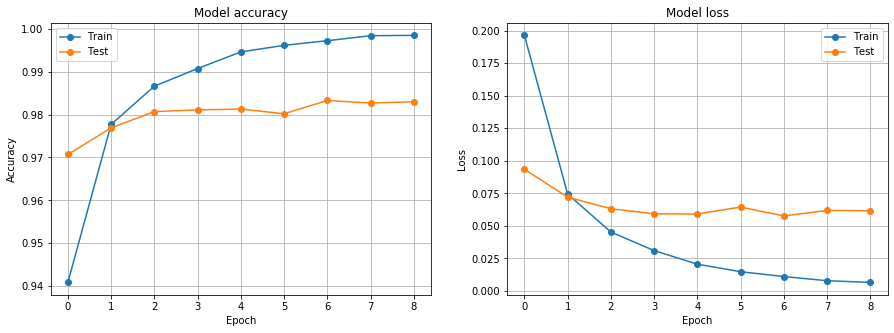

In [22]:
from utils import plot
plot(hist)